> # **Projet:** Classification du Diagnostic du Cancer du Sein



# **1. Collecte et Exploration des Données :**

In [ ]:
#H: importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***- Charger le dataset et explorer ses caractéristiques.***



In [ ]:
#H: charger la dataset
my_ds = pd.read_csv('/content/drive/MyDrive/ADIA_24 25/S6/Machine Learning/Mini-Projet/Breast Cancer Wisconsin.csv')
print(my_ds.shape)
my_ds.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#H: informations sur la dataset
my_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#H: les colonnes de la dataset
my_ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#H: vérifier les valeurs des malin et non
my_ds['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
#H startistique de chaque colonne
my_ds.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


***- Visualiser les relations entre les caractéristiques et les classes de tumeurs.***

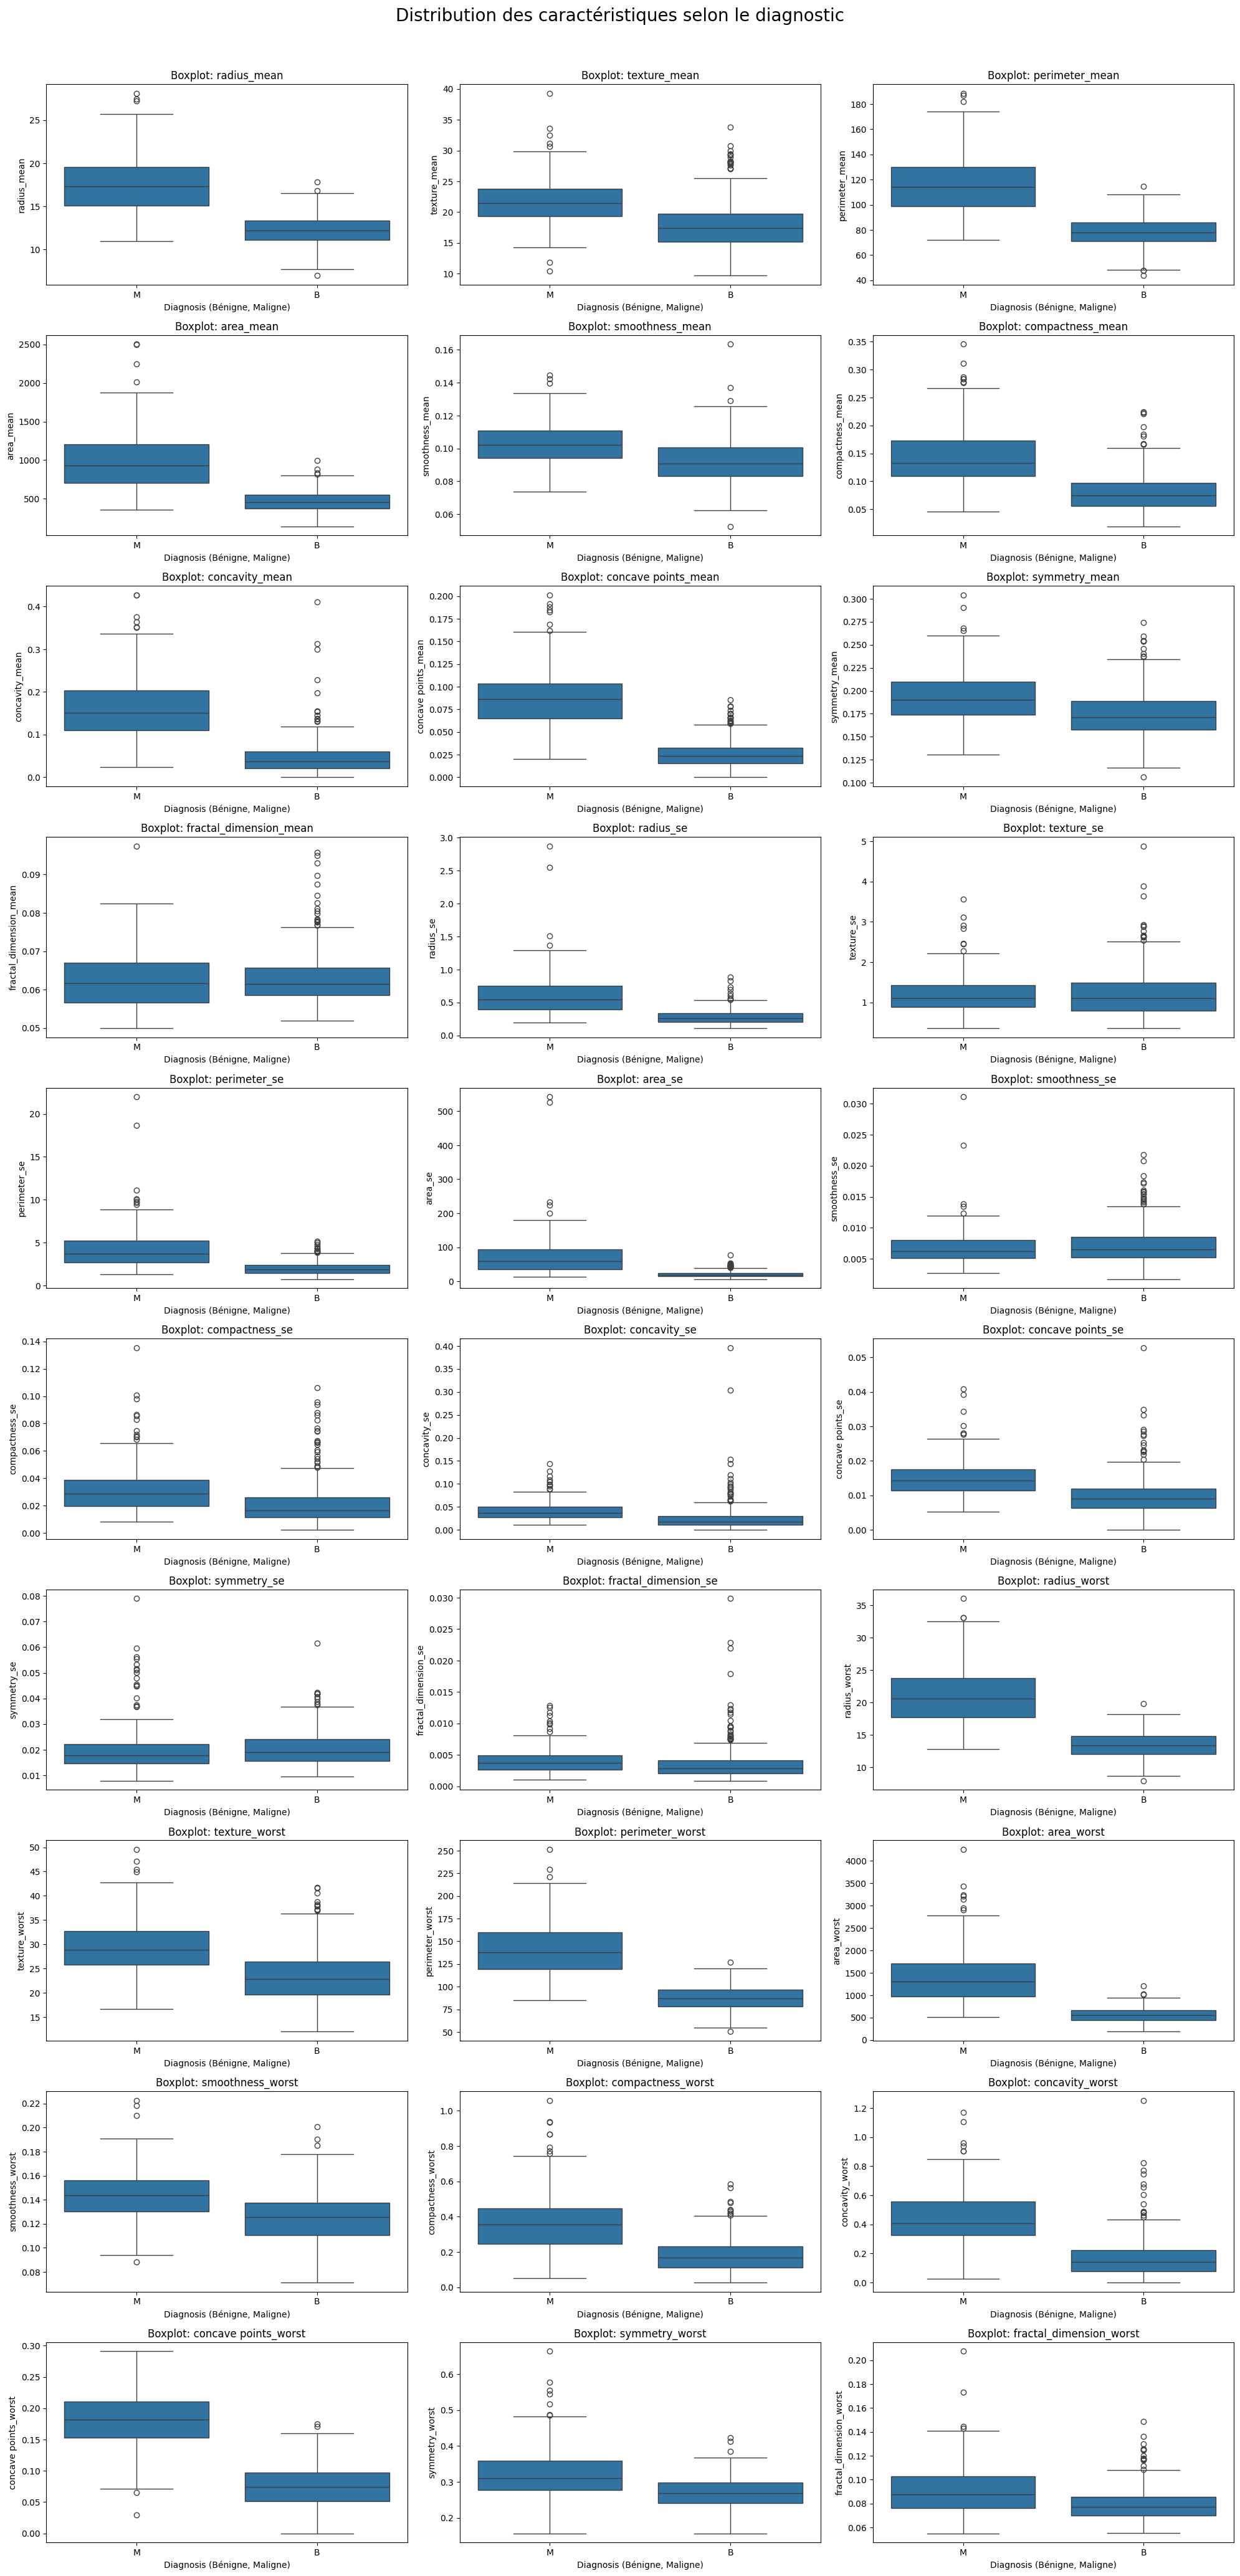

In [ ]:
features = my_ds.columns.drop(['id', 'diagnosis','Unnamed: 32'])

n_cols = 3
n_rows = int(len(features) / n_cols) + 1
plt.figure(figsize=(20, n_rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='diagnosis', y=feature, data=my_ds)
    plt.title(f'Boxplot: {feature}')
    plt.xlabel('Diagnosis (Bénigne, Maligne)')
    plt.tight_layout()

plt.suptitle("Distribution des caractéristiques selon le diagnostic", fontsize=20, y=1.02)
plt.show()

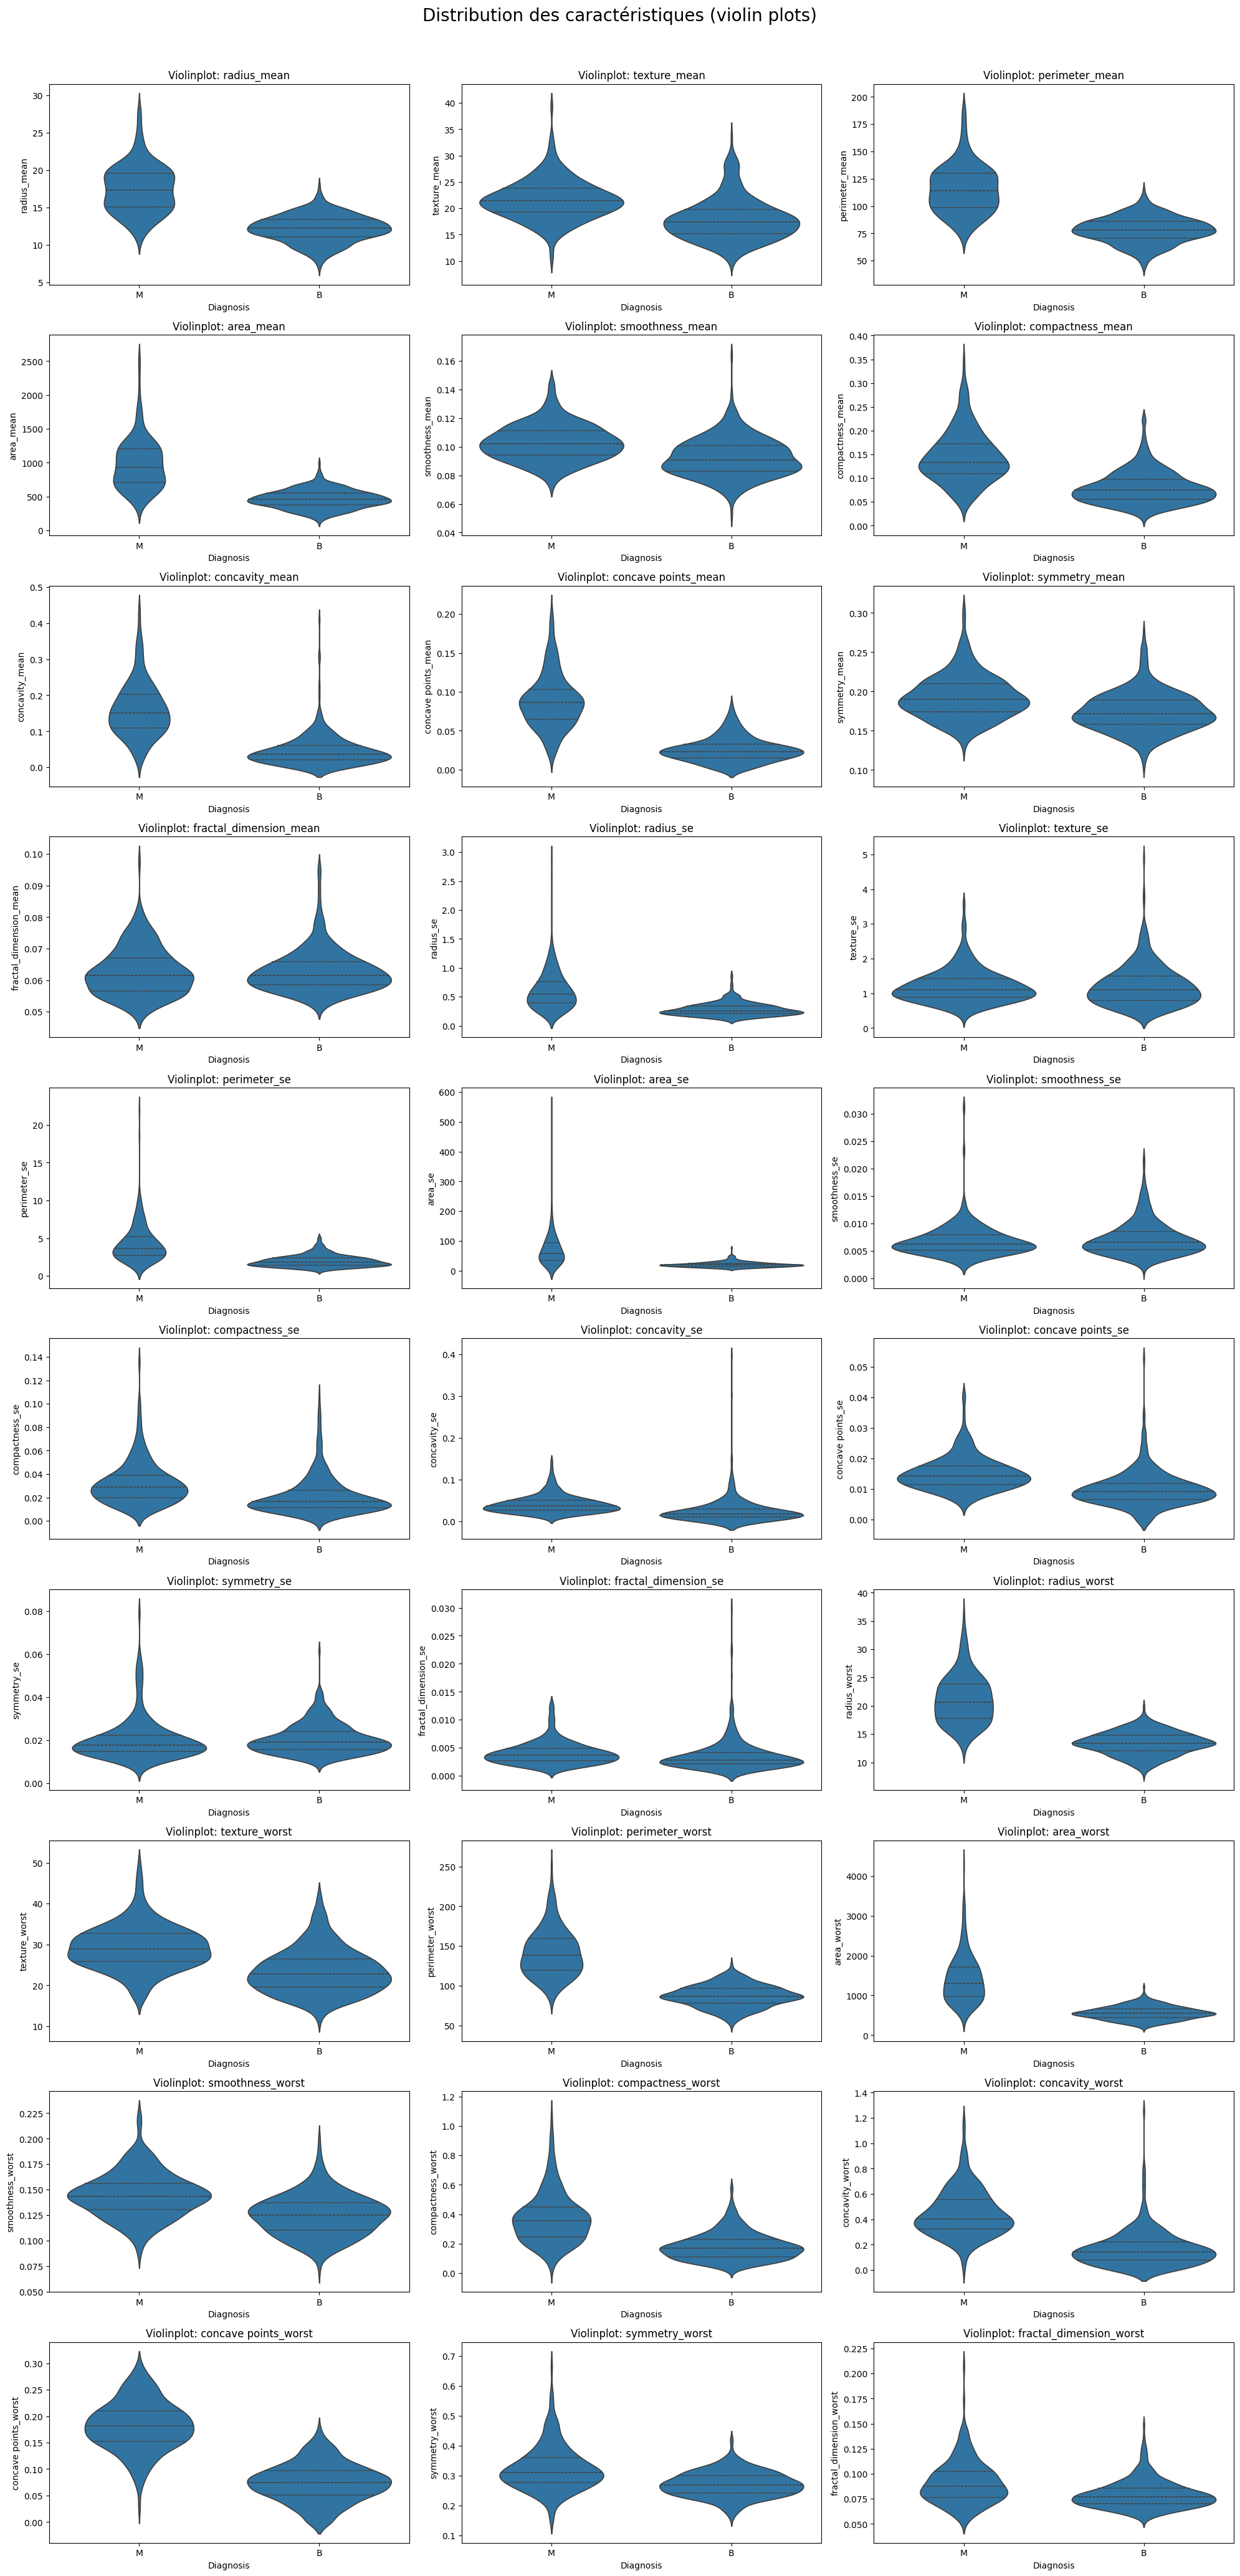

In [ ]:
plt.figure(figsize=(20, n_rows * 4))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x='diagnosis', y=feature, data=my_ds, inner='quartile')
    plt.title(f'Violinplot: {feature}')
    plt.xlabel('Diagnosis')
    plt.tight_layout()
plt.suptitle("Distribution des caractéristiques (violin plots)", fontsize=20, y=1.02)
plt.show()


D'après les deux plots (box et violin) les caractéristique du group _se ont des médianes très proches ou identiques entre les deux classes certaines fois (Bégnine et Maline), donc je vais les éliminer des features finales sur lesquelles les modèles vont êtres basés.

In [ ]:
#H: enlever tous les colones _se
my_filtred_ds = my_ds.loc[:, ~my_ds.columns.str.endswith('_se')]

#H: redéfinir les features utiles
features = my_filtred_ds.columns.drop(['id', 'diagnosis', 'Unnamed: 32'])

#H: check
my_filtred_ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

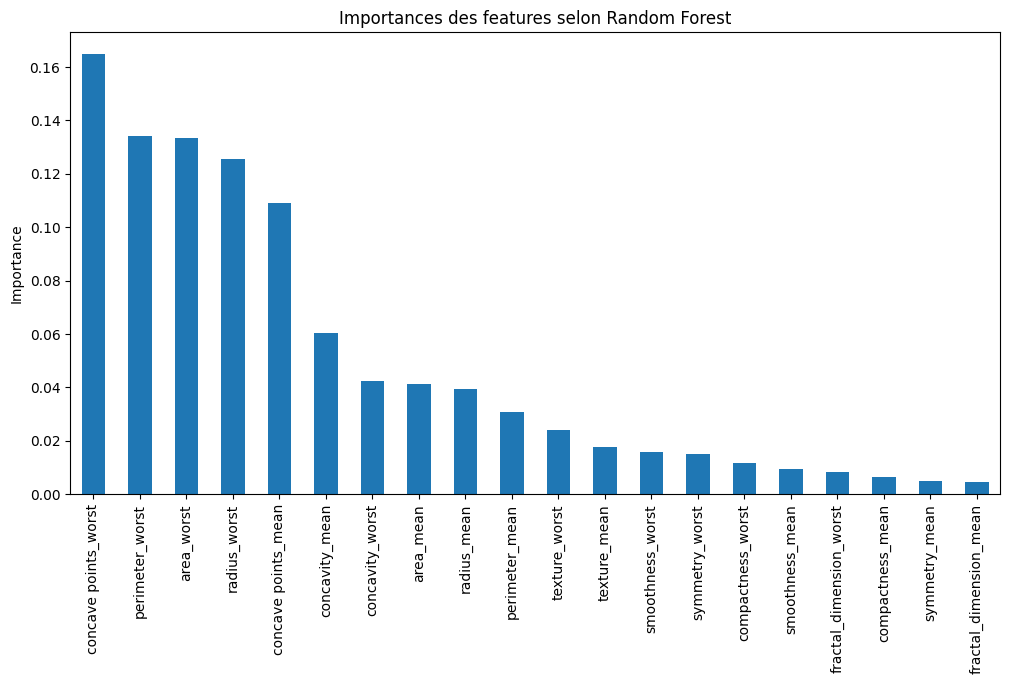

In [ ]:
#H: savoir le degré d'importance de chaque feature par RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#H: spécifier les axes
X = my_filtred_ds[features]
y = my_filtred_ds['diagnosis'].map({'B':0, 'M':1})

#H: entrainer
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

#H: récupérer les résutats
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

#H: visualiser
plt.figure(figsize=(12,6))
importances.plot(kind='bar')
plt.title("Importances des features selon Random Forest")
plt.ylabel("Importance")
plt.show()

Comme on a l'importance compris entre 0 et 0.16 avec 20 features, donc les features les plus importantes sont avec une importance >= 0.05 et qui sont: concavity_mean, concave_points_mean, radius_worst, area_worst, perimeter_worst, concave_points_worst

# **2. Prétraitement des Données :**

***- Vérifier s'il y a des valeurs manquantes ou des valeurs aberrantes.***

In [ ]:
#H: confirmer les nombres des valeurs null
my_filtred_ds.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#H: drop id et unnamed
my_filtred_ds = my_filtred_ds.drop(['id', 'Unnamed: 32'], axis=1)
my_filtred_ds.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#H: Détection de nombre des valeurs annormales pour chacunne des features
Q1 = my_filtred_ds[features].quantile(0.25)
Q3 = my_filtred_ds[features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((my_filtred_ds[features] < (Q1 - 1.5 * IQR)) | (my_filtred_ds[features] > (Q3 + 1.5 * IQR)))
print("Nombre de valeurs aberrantes par caractéristique :")
print(outliers.sum().sort_values(ascending=False))

Nombre de valeurs aberrantes par caractéristique :
area_worst                 35
area_mean                  25
fractal_dimension_worst    24
symmetry_worst             23
concavity_mean             18
radius_worst               17
compactness_mean           16
compactness_worst          16
perimeter_worst            15
fractal_dimension_mean     15
symmetry_mean              15
radius_mean                14
perimeter_mean             13
concavity_worst            12
concave points_mean        10
texture_mean                7
smoothness_worst            7
smoothness_mean             6
texture_worst               5
concave points_worst        0
dtype: int64


***- Normaliser les données si nécessaire.***



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

***- Division des données en ensembles d'entraînement et de test.***

In [ ]:
from sklearn.model_selection import train_test_split
import joblib

X = my_filtred_ds[features]
y = my_filtred_ds['diagnosis'].map({'B': 0, 'M': 1})

#H: on a donné 20% de data pour le test et les 80% restantes pour l'entrainement, satisfy=y permet d'équilibrer les classes dans les parties de data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#H: Normaliser les données par le scaler prédéfinit
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_train_val_scaled = pd.DataFrame(X_train_val_scaled, columns=X_train_val.columns, index=X_train_val.index)


#H: training+validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val_scaled, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


print("Les tailles des parties de dataset:\n")
print(f"Originale: {len(X)}")
print(f"Entrainement: {len(X_train)} ({len(X_train)/len(X):.2f} de l'original)")
print(f"Validation: {len(X_val)} ({len(X_val)/len(X):.2f} de l'original)")
print(f"Test : {len(X_test)} ({len(X_test)/len(X):.2f} de l'original)")

print("\nTaille de X_train_scaled:", X_train.shape)
print("Taille de X_val_scaled:", X_val.shape)
print("Taille de X_test_scaled:", X_test_scaled.shape)

X_train.head()

Les tailles des parties de dataset:

Originale: 569
Entrainement: 341 (0.60 de l'original)
Validation: 114 (0.20 de l'original)
Test : 114 (0.20 de l'original)

Taille de X_train_scaled: (341, 20)
Taille de X_val_scaled: (114, 20)
Taille de X_test_scaled: (114, 20)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
194,0.194096,0.884826,0.331476,0.032836,0.588154,1.748625,0.986613,1.003104,-0.282343,0.575215,-0.055460,0.308771,0.314587,-0.181998,-0.020594,1.322606,0.867351,0.856807,0.137140,0.159037
46,-1.669883,-0.601431,-1.640582,-1.271249,-0.699103,-0.824588,-0.898247,-1.087161,-0.166468,0.332502,-1.508996,-0.649593,-1.482214,-1.114600,-0.101599,-0.757332,-0.974193,-1.345668,0.303875,-0.552861
332,-0.824044,0.103200,-0.821220,-0.756281,0.658114,-0.669345,-1.031493,-1.045135,0.452742,-0.349682,-0.892939,-0.020564,-0.906617,-0.781270,0.439855,-1.003878,-1.235956,-1.426841,0.600823,-1.041602
76,-0.177916,-1.978026,-0.174398,-0.278811,2.316157,0.016066,-0.250150,0.417367,2.129315,0.530694,-0.463986,-2.208993,-0.483340,-0.490057,0.554967,-0.743428,-0.895877,-0.620346,-0.323367,-0.672980
124,-0.222670,-0.706425,-0.247707,-0.294643,-1.738003,-0.567954,-0.101268,-0.530105,-1.422992,-0.644098,-0.427219,-0.519506,-0.464886,-0.444330,-1.261248,-0.015354,0.262630,-0.385062,-1.374593,-0.432191


In [ ]:
joblib.dump(scaler, 'fitted_scaler.pkl')

['fitted_scaler.pkl']

# **3. Construction des Modèles et Entraînement des Modèles :**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
models = {}
best_params = {}

***- Optimisation des hyperparamètres pour améliorer les performances des modèles.***


Afin d'optimiser les modèles et d'assurer leur bonne performance, on a utilisé ```GridSearchCV ```. Cette fonction permet de tester automatiquement plusieurs combinaisons d'hyperparamètres, puis de sélectionner celle qui donne les meilleurs résultats. Cela permet ainsi d'obtenir la version la plus fiable de chaque modèle.

Pour chaque algorithme, on a défini une grille d'hyperparamètres à explorer, puis on a configuré ```GridSearchCV ``` en lui associant le modèle et les options à tester. La meilleure combinaison identifiée est récupérée avec le modèle entraîné avec ces paramètres optimaux, et on l'a enregistré pour pouvoir l'utiliser facilement lors de l'intégration avec une interface.


- Regression Logistique:

In [ ]:
#H: Définition des hyperparamètres à optimiser avec GridSearchCV
param_grid_lreg = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'eta0': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000]
}

#H: utiliser GridSearchCV sur l'ensemble d'entraînement (X_train, y_train)
grid_search_lreg = GridSearchCV(SGDClassifier(loss='log_loss', random_state=42),
                                param_grid_lreg,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)

grid_search_lreg.fit(X_train, y_train)

best_lreg_model = grid_search_lreg.best_estimator_
best_params['LogisticRegression_SGD'] = grid_search_lreg.best_params_
models['LogisticRegression_SGD'] = best_lreg_model

print(f"Meilleurs hyperparamètres pour (SGD) : {best_params['LogisticRegression_SGD']}")
print(f"Accuracy pour (SGD) : {grid_search_lreg.best_score_:.4f}")

joblib.dump(best_lreg_model, 'best_logistic_regression_model.pkl')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs hyperparamètres pour (SGD) : {'alpha': 0.01, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
Accuracy pour (SGD) : 0.9707


['best_logistic_regression_model.pkl']

- KNN

In [ ]:
#H: définition des hyperparamètres à optimiser
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)
grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
best_params['KNeighborsClassifier'] = grid_search_knn.best_params_
models['KNeighborsClassifier'] = best_knn_model

print(f"Meilleurs hyperparamètres pour KNN : {best_params['KNeighborsClassifier']}")
print(f"Accuracy pour KNN : {grid_search_knn.best_score_:.4f}")

joblib.dump(best_knn_model, 'best_knn_model.pkl')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Meilleurs hyperparamètres pour KNN : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy pour KNN : 0.9590


['best_knn_model.pkl']

- Arbre de décision

In [ ]:
#H: définition des hyperparamètres à optimiser
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid_dt,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
best_params['DecisionTreeClassifier'] = grid_search_dt.best_params_
models['DecisionTreeClassifier'] = best_dt_model

print(f"Meilleurs hyperparamètres pour l'Arbre de Décision : {best_params['DecisionTreeClassifier']}")
print(f"Accuracy pour l'Arbre de Décision : {grid_search_dt.best_score_:.4f}")

joblib.dump(best_dt_model, 'best_decision_tree_model.pkl')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs hyperparamètres pour l'Arbre de Décision : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}
Accuracy pour l'Arbre de Décision : 0.9298


['best_decision_tree_model.pkl']

# **5. Évaluation des Modèles :**

Dans cette partie, nous étudions plus en détail les performances de chaque modèle afin de pouvoir les comparer et déterminer lequel est le plus adapté à notre cas.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
#H: définir une fonction d'évaluation

def model_evaluation_metrics(model, X_test, y_test):
    #H: les prédictions
    y_pred = model.predict(X_test)
    model_metrics = {}

    #H: les métriques
    model_metrics['accuracy'] = accuracy_score(y_test, y_pred)
    model_metrics['precision'] = precision_score(y_test, y_pred)
    model_metrics['recall'] = recall_score(y_test, y_pred)
    model_metrics['f1'] = f1_score(y_test, y_pred)
    model_metrics['c_matrix'] = confusion_matrix(y_test, y_pred)
    model_metrics['class_report'] = classification_report(y_test, y_pred, target_names=['Bénigne (0)', 'Maligne (1)'])

    #H: return the values
    return model_metrics

#H: definir une fonction pour plot de la matrice
def plot_confusion_matrix(matrix, model_name):
  plt.figure(figsize=(7, 6))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Prédit Bénigne', 'Prédit Maligne'],
              yticklabels=['Réel Bénigne', 'Réel Maligne'])
  plt.title(f'Matrice de Confusion pour {model_name}', fontsize=14)
  plt.xlabel('Prédiction', fontsize=12)
  plt.ylabel('Vraie Valeur', fontsize=12)
  plt.show()

- Evaluation de SGD

Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1 Score: 0.9756
Classification repport :
               precision    recall  f1-score   support

 Bénigne (0)       0.97      1.00      0.99        72
 Maligne (1)       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



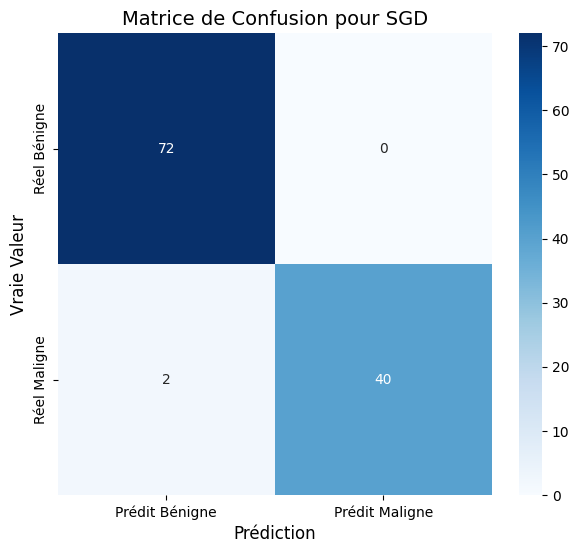

In [ ]:
sgd_metrics = model_evaluation_metrics(best_lreg_model, X_test_scaled, y_test)

print(f"Accuracy: {sgd_metrics['accuracy']:.4f}")
print(f"Precision: {sgd_metrics['precision']:.4f}")
print(f"Recall: {sgd_metrics['recall']:.4f}")
print(f"F1 Score: {sgd_metrics['f1']:.4f}")
print(f"Classification repport :\n",sgd_metrics['class_report'] )

plot_confusion_matrix(sgd_metrics['c_matrix'], "SGD")

- Evaluation de KNN

Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512
Classification repport :
               precision    recall  f1-score   support

 Bénigne (0)       0.96      0.99      0.97        72
 Maligne (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



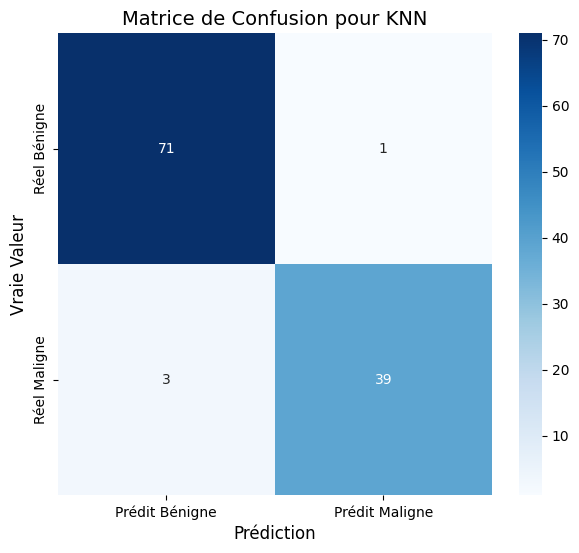

In [ ]:
knn_metrics = model_evaluation_metrics(best_knn_model, X_test_scaled, y_test)

print(f"Accuracy: {knn_metrics['accuracy']:.4f}")
print(f"Precision: {knn_metrics['precision']:.4f}")
print(f"Recall: {knn_metrics['recall']:.4f}")
print(f"F1 Score: {knn_metrics['f1']:.4f}")
print(f"Classification repport :\n",knn_metrics['class_report'] )

plot_confusion_matrix(knn_metrics['c_matrix'], "KNN")

- Evaluation de l'arbre de décision

Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512
Classification repport :
               precision    recall  f1-score   support

 Bénigne (0)       0.96      0.99      0.97        72
 Maligne (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



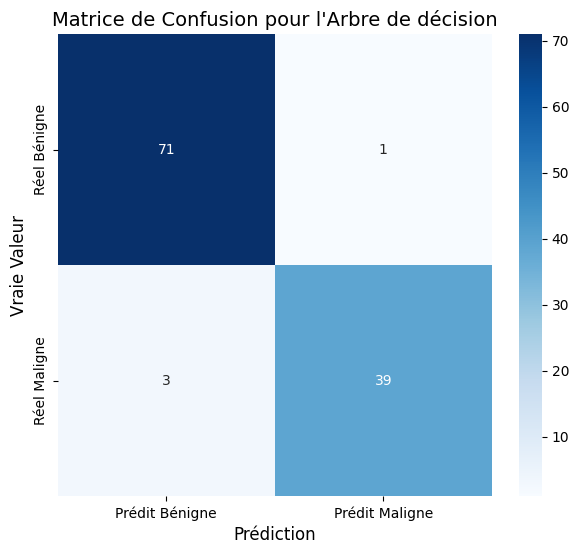

In [ ]:
dt_metrics = model_evaluation_metrics(best_knn_model, X_test_scaled, y_test)

print(f"Accuracy: {dt_metrics['accuracy']:.4f}")
print(f"Precision: {dt_metrics['precision']:.4f}")
print(f"Recall: {dt_metrics['recall']:.4f}")
print(f"F1 Score: {dt_metrics['f1']:.4f}")
print(f"Classification repport :\n",dt_metrics['class_report'] )

plot_confusion_matrix(dt_metrics['c_matrix'], "l'Arbre de décision")

***- Comparaison des performances des différents modèles.***

In [ ]:
comparison_df = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'KNN', 'Arbre de Décision'],
    'Accuracy': [sgd_metrics['accuracy'], knn_metrics['accuracy'], dt_metrics['accuracy']],
    'Precision': [sgd_metrics['precision'], knn_metrics['precision'], dt_metrics['precision']],
    'Recall': [sgd_metrics['recall'], knn_metrics['recall'], dt_metrics['recall']],
    'F1 Score': [sgd_metrics['f1'], knn_metrics['f1'], dt_metrics['f1']]
})

# Affichage
print(comparison_df.sort_values(by='Accuracy', ascending=False))

                  Modèle  Accuracy  Precision    Recall  F1 Score
0  Régression Logistique  0.982456      1.000  0.952381   0.97561
1                    KNN  0.964912      0.975  0.928571   0.95122
2      Arbre de Décision  0.964912      0.975  0.928571   0.95122


On constate que la régression logistique donne les meilleurs résultats dans notre cas, avec une précision parfaite (1.00) et une accuracy de 98.25 %. Elle a su bien distinguer les cas sans générer de faux positifs, ce qui est très important dans un contexte médical. Son rappel est aussi élevé (0.95), ce qui veut dire qu’elle détecte très bien les tumeurs malignes.

Le KNN et l’arbre de décision ont eu des résultats assez proches l’un de l’autre, avec une accuracy de 96.49 %. Leur précision est également bonne, mais leur rappel un peu plus bas (0.93) montre qu’ils ont laissé passer quelques cas. Ils restent malgré tout fiables, mais un peu moins que la régression.

En résumé, chaque modèle a ses forces, mais ici, la régression logistique est la plus adaptée à notre cas d'étude.





# **6. Tester les modèles sur la dataset de test**

***- La regrésion logistique:***

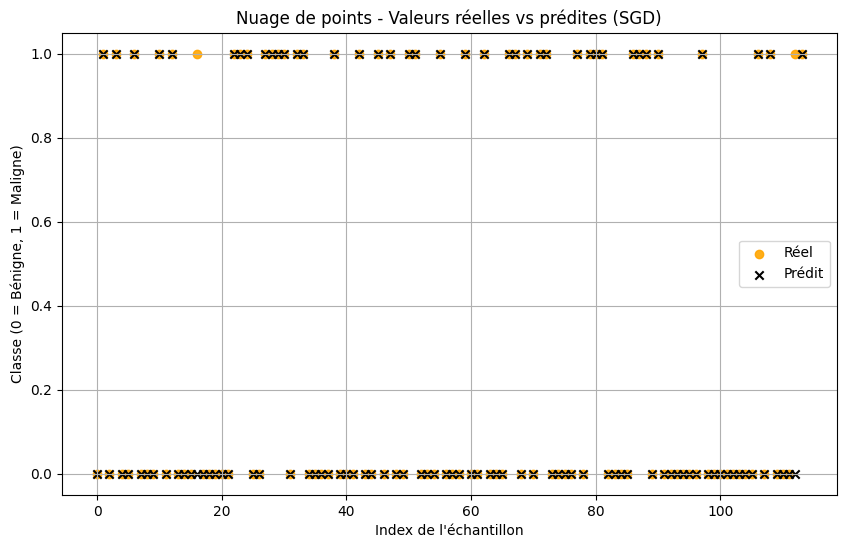

In [ ]:
y_pred_sgd = best_lreg_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='orange', label='Réel', alpha=0.9)
plt.scatter(range(len(y_pred_sgd)), y_pred_sgd, color='black', label='Prédit', alpha=1, marker='x')
plt.title("Nuage de points - Valeurs réelles vs prédites (SGD)")
plt.xlabel("Index de l'échantillon")
plt.ylabel("Classe (0 = Bénigne, 1 = Maligne)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
comparison_df_sgd = pd.DataFrame({
    'Réel': y_test[:20].values,
    'Prédit': y_pred_sgd[:20]
})
comparison_df_sgd

,Réel,Prédit
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


***- Knn***

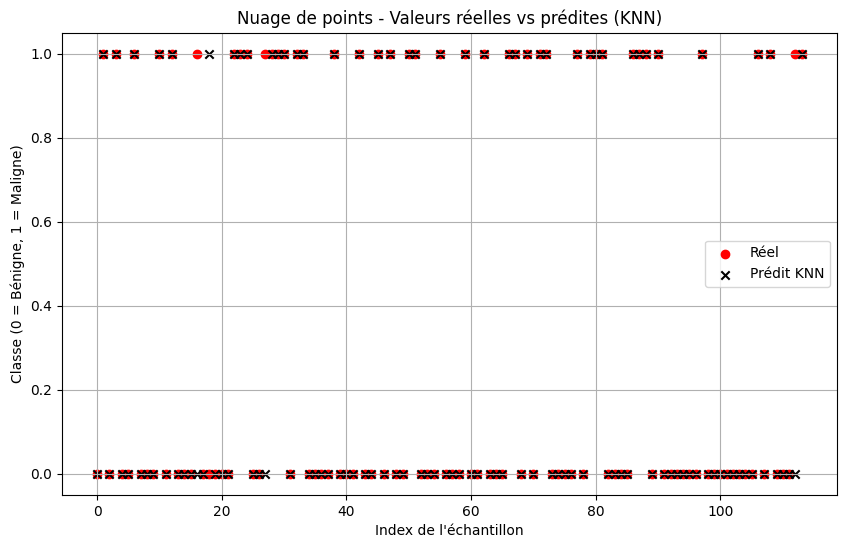

In [ ]:
y_pred_knn = best_knn_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Réel', alpha=1)
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='black', label='Prédit KNN', alpha=1, marker='x')
plt.title("Nuage de points - Valeurs réelles vs prédites (KNN)")
plt.xlabel("Index de l'échantillon")
plt.ylabel("Classe (0 = Bénigne, 1 = Maligne)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
comparison_df_knn = pd.DataFrame({
    'Réel': y_test[:20].values,
    'Prédit': y_pred_knn[:20]
})
comparison_df_knn

,Réel,Prédit
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


***- Arbre de décision***

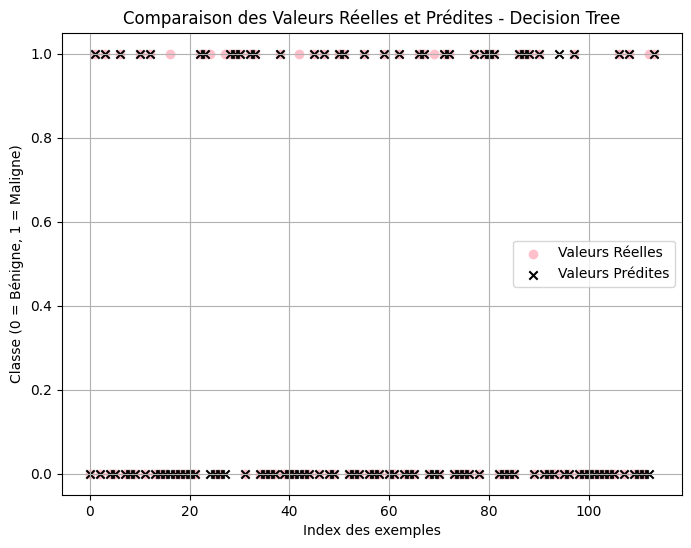

In [ ]:
y_pred_dt = best_dt_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='pink', label='Valeurs Réelles')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='black', alpha=1, marker= 'x', label='Valeurs Prédites')
plt.title("Comparaison des Valeurs Réelles et Prédites - Decision Tree")
plt.xlabel("Index des exemples")
plt.ylabel("Classe (0 = Bénigne, 1 = Maligne)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
comparison_df_dt = pd.DataFrame({
    'Réel': y_test[:20].values,
    'Prédit': y_pred_dt[:20]
})
comparison_df_dt

,Réel,Prédit
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


# **7. Interprétation des Résultats :**

Au début on a éliminer tous les caractéristiques _se, et l'algorithme de Random Forest a classé `[concavity_mean, concave_points_mean, radius_worst, area_worst, perimeter_worst, concave_points_worst]` comme les features les plus importantes dans la dataset et qui affecte plus les résultats de classification. Dans cette partie, on va vérifier cette probabilité on déterminant les features importantes pour chacun des modèles.

- SGD

<ipython-input-34-8887593d45b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')


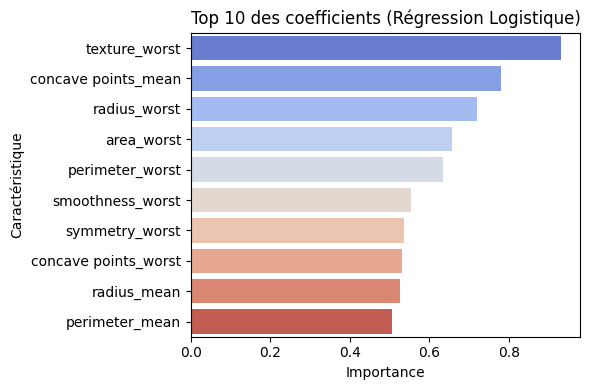

In [ ]:
coefs = best_lreg_model.coef_[0]  # vecteur de poids
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

#H: on visualise just les 10 plus importantes features
plt.figure(figsize=(6, 4))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 des coefficients (Régression Logistique)")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.tight_layout()
plt.show()

- Knn

<ipython-input-35-8d8d4c9fed05>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='importance_mean', y='feature', palette='viridis')


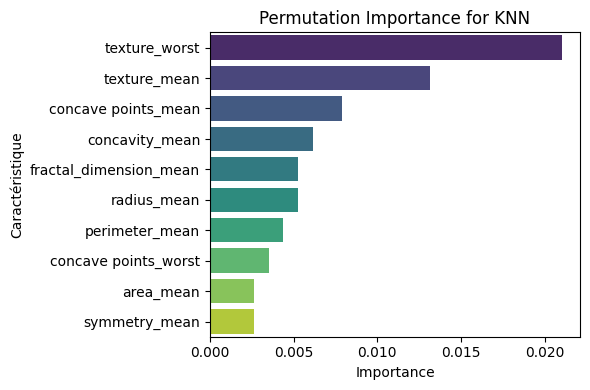

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances on the test set
result = permutation_importance(best_knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extract and sort
importances = pd.DataFrame({
    'feature': features,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=importances.head(10), x='importance_mean', y='feature', palette='viridis')
plt.title("Permutation Importance for KNN")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.tight_layout()
plt.show()


- Arbre de décision

<ipython-input-36-454c2e3f1dfc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


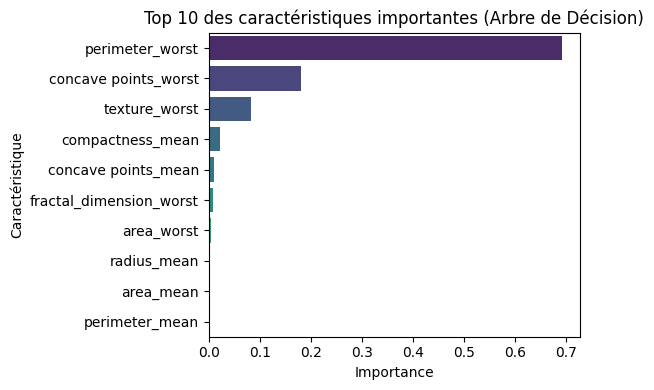

In [ ]:
importances = best_dt_model.feature_importances_
feature_names = features  # ou ta liste `features`
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 des caractéristiques importantes (Arbre de Décision)")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.tight_layout()
plt.show()

Chacun des modèles est affecté plus par certaines caractéristiques est cela due à la nature de chacun.